# Glass Identification Project

**Importing necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

**Importing Dataset & showing first 5 rows**

In [6]:
df_glass = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv",header=None)
df_glass.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Exploratory Data Analysis(EDA)

In [7]:
#checking the dimension of the dataset
df_glass.shape

(214, 11)

This dataset contains 1338 rows and 7 columns.

In [8]:
#getting the information from the dataset
df_glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       214 non-null    int64  
 1   1       214 non-null    float64
 2   2       214 non-null    float64
 3   3       214 non-null    float64
 4   4       214 non-null    float64
 5   5       214 non-null    float64
 6   6       214 non-null    float64
 7   7       214 non-null    float64
 8   8       214 non-null    float64
 9   9       214 non-null    float64
 10  10      214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [9]:
# Checking Data type of Columns
df_glass.dtypes

0       int64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10      int64
dtype: object

In [11]:
# checking for the missing values
df_glass.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

We can see there are no missing values present in the dataset.

# **Attribute Information:**

Id number: 1 to 214 (removed from CSV file)

*   RI: refractive index
*   Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
*   Mg: Magnesium
*   Al: Aluminum
*   K: Potassium
*   Ca: Calcium
*   Ba: Barium
*   Fe: Iron
*   Type of glass: (class attribute)  [1-7]
    1.   Building_windows_float_processed
    2.   Building_windows_non_float_processed
    3.   Vehicle_windows_float_processed
    4.   Vehicle_windows_non_float_processed
    5.   Containers
    6.   Tableware
    7.   Headlamps




















### Adding column names

In [12]:
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
df_glass.columns = names
df_glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Removing unnecessary columns

In [13]:
#dropping Id number column
df_glass = df_glass.drop('Id',1)

In [14]:
df_glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [15]:
df_glass.shape

(214, 10)

## Statistical analysis of the dataset

In [16]:
df_glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The summary of the dataset looks perfect since there is no negative/invalid values present in it.

The counts of all the columns are same i.e,214 which means there are no missing values present in it.

# **Data Visualization** 

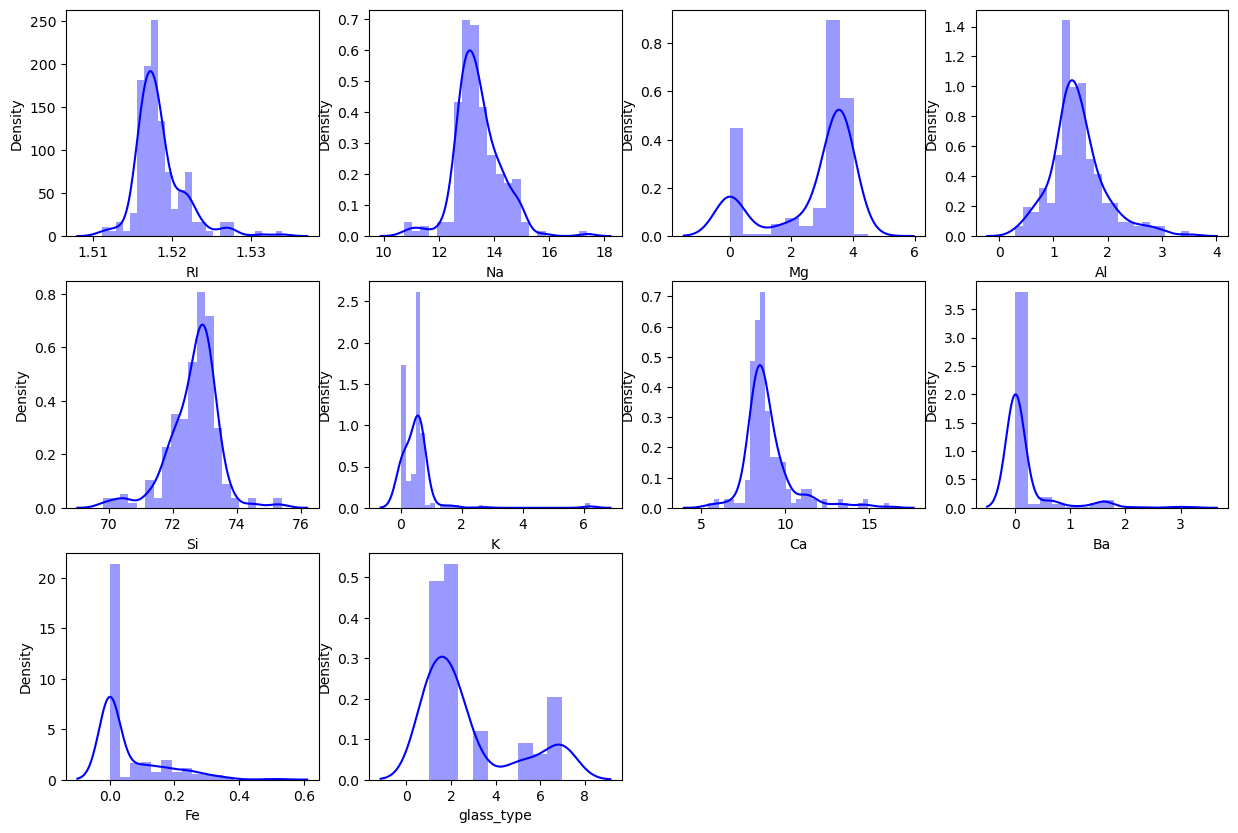

In [17]:
#visualization of data distribution
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in df_glass:
    if plotnumber <= 10:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df_glass[column],color='b')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

From the above distribution plots, we can see that the data looks like normally distributed(showing bell shaped curve) for all the columns.
Some of columns('K','Ba','Fe') looks like some outliers present in them.So,we need to remove them.

### Removing Outliers using z-score method

In [19]:
from scipy.stats import zscore
z=zscore(df_glass[['K','Ba','Fe']])
abs_z=np.abs(z)
df_glass=df_glass[(abs_z<3).all(axis=1)]#3-std deviation data
df_glass.shape

(202, 10)

Now we can see the outliers has been removed,as previously the row size was 214.

## Correlation using Heatmap

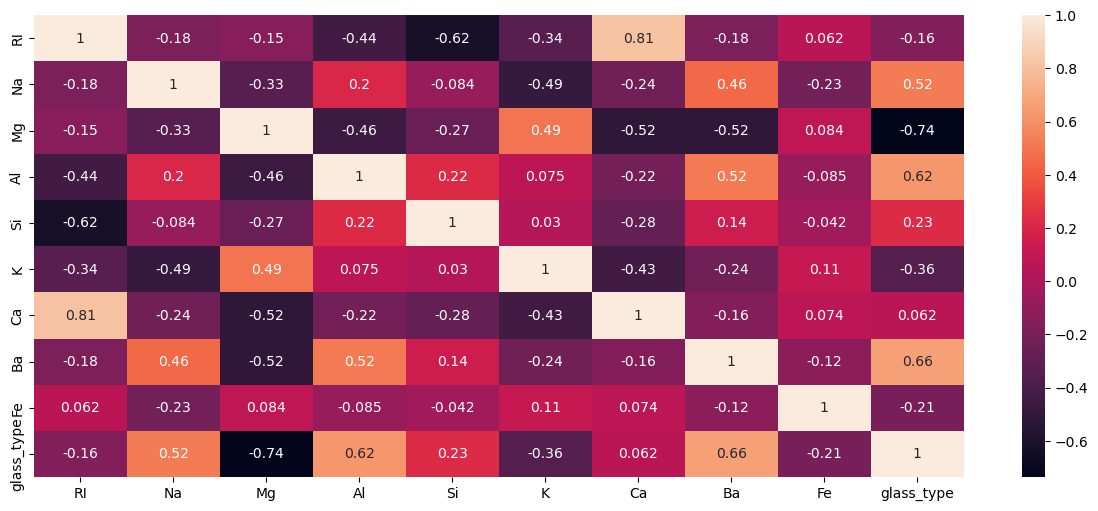

In [20]:
plt.figure(figsize=(15,6))
sns.heatmap(df_glass.corr(),annot=True)
plt.show()

From above correlation matrix, we can see the positive as well as negative correlations between the label and other features.

### Separating the features and target 

In [28]:
x = df_glass.drop(['glass_type'],axis=1)
y = df_glass['glass_type']

### Visualizing the relationship of features with the label/target.

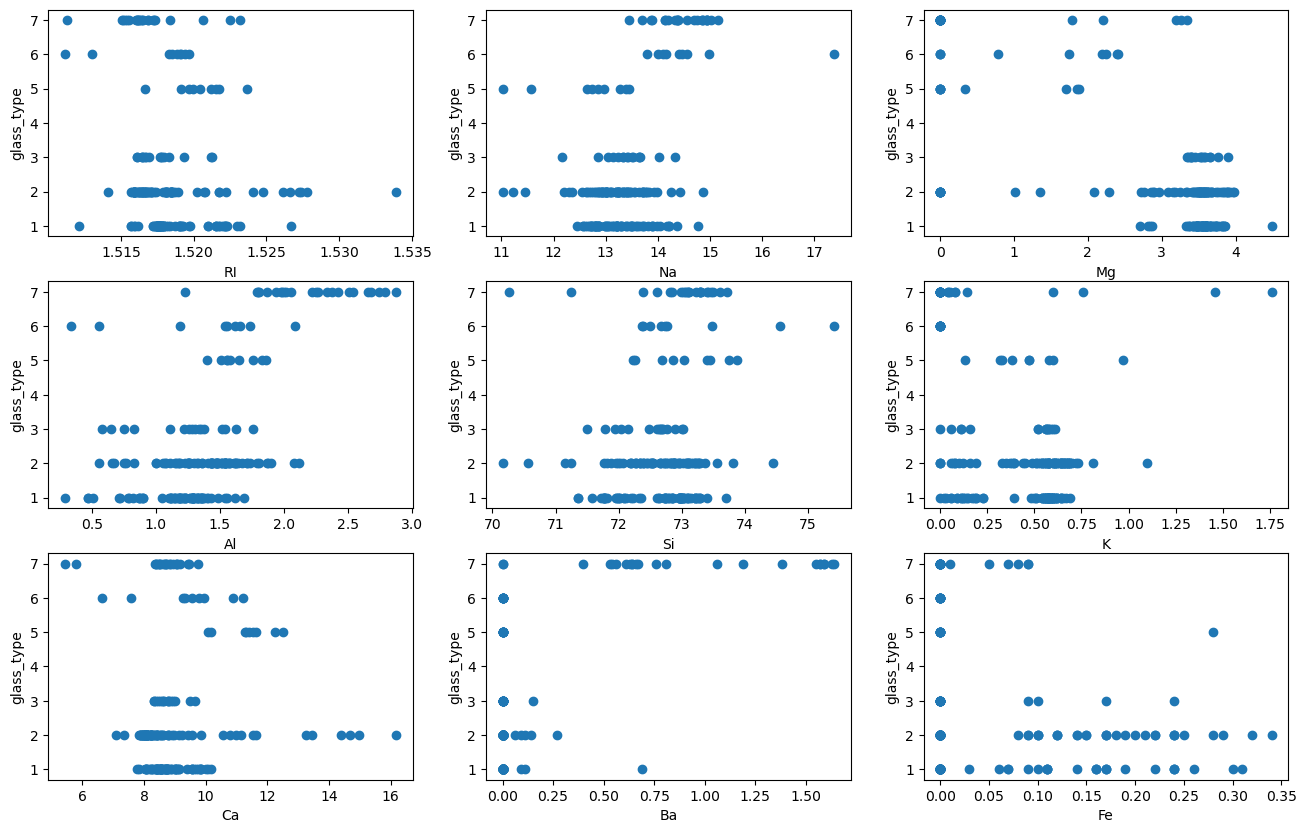

In [30]:
plt.figure(figsize=(16,10), facecolor='white')
plotnumber=1
for column in x:
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('glass_type',fontsize=10)
    plotnumber+=1
plt.show()

### Data Scaling using Standard Scaler

In [31]:
sc = StandardScaler()
x_scaled=sc.fit_transform(x)

### Splitting the data into Train and Test Set.

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

Here using the 80% data for the training set and 20% data for the testing set.

## Model Building(Classification)

### Desicision Tree Classifier

In [35]:
model1 = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=None)
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [36]:
pred = model1.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model1, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 78%
Classification Report :
               precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.82      0.60      0.69        15
           3       0.33      0.67      0.44         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         1
           7       0.80      1.00      0.89         4

    accuracy                           0.78        41
   macro avg       0.80      0.82      0.80        41
weighted avg       0.82      0.78      0.79        41

Cross Validation Score: 0.6092682926829268
Difference between Accuracy Score and Cross Validation Score is 0.171219512195122


#### Here we are getting the 78% accuracy from DecisionTree Classifier.

### K-Nearest Neighbors Classifier

In [38]:
model2 = KNeighborsClassifier()
model2.fit(x_train, y_train)

KNeighborsClassifier()

In [39]:
pred = model2.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model2, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 63%
Classification Report :
               precision    recall  f1-score   support

           1       0.55      0.79      0.65        14
           2       0.62      0.53      0.57        15
           3       0.00      0.00      0.00         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4

    accuracy                           0.63        41
   macro avg       0.69      0.64      0.65        41
weighted avg       0.63      0.63      0.62        41

Cross Validation Score: 0.6191463414634147
Difference between Accuracy Score and Cross Validation Score is 0.014999999999999902


#### Here we are getting the 63% accuracy from DecisionTree Classifier.

## Logistic Regression

In [40]:
model3 = LogisticRegression()
model3.fit(x_train, y_train)

LogisticRegression()

In [41]:
pred = model3.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model3, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 71%
Classification Report :
               precision    recall  f1-score   support

           1       0.61      0.79      0.69        14
           2       0.73      0.73      0.73        15
           3       0.00      0.00      0.00         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4

    accuracy                           0.71        41
   macro avg       0.72      0.67      0.68        41
weighted avg       0.70      0.71      0.69        41

Cross Validation Score: 0.5941463414634147
Difference between Accuracy Score and Cross Validation Score is 0.11317073170731695


#### Here we are getting the 71% accuracy from Logistic Regression.

## Random Forest Classifier

In [42]:
model4 = RandomForestClassifier()
model4.fit(x_train, y_train)

RandomForestClassifier()

In [43]:
pred = model4.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model4, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 73%
Classification Report :
               precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.75      0.60      0.67        15
           3       0.25      0.33      0.29         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         1
           7       0.80      1.00      0.89         4

    accuracy                           0.73        41
   macro avg       0.76      0.73      0.72        41
weighted avg       0.75      0.73      0.73        41

Cross Validation Score: 0.6978048780487806
Difference between Accuracy Score and Cross Validation Score is 0.03390243902439016


#### Here we are getting the 73% accuracy from Random Forest Classifier.